In [34]:
from copyreg import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.lines import lineStyles
from networkx.algorithms.bipartite.basic import color

from model import model
from DataExtraction import utils
import os
import ujson

In [35]:
# Load, from each model, the results, the model configuration and the evaluation metrics
os.chdir(utils.get_root_dir() + '/model/final_models')
n_models = len([name for name in os.listdir('.') if 'model_' in name])
training_stats, testing_stats, model_results, model_info = {}, {}, {}, {}
for i in range(1, n_models + 1):
    m = model.load_model(f'model_{i}')
    model_info[m.model_config.model_name] = m.model_config.__dict__
    # Print name and num of parameters for each model
    print(m.model_config.model_name, sum(p.numel() for p in m.parameters()))
    with open(m.model_config.model_src + '/train/training_stats.json', 'r') as f:
        training_stats[m.model_config.model_name] = ujson.load(f)
    with open(m.model_config.model_src + '/test/losses.json', 'r') as f:
        testing_stats[m.model_config.model_name] = ujson.load(f)
    model_results[m.model_config.model_name] = np.load(m.model_config.model_src + '/test/y_pred.npy'), np.load(m.model_config.model_src + '/test/y_test.npy')
    del m

Model model_1 created
model_1 732809
Model model_2 created
model_2 732809
Model model_3 created
model_3 732809
Model model_4 created
model_4 732809
Model model_5 created
model_5 1592585
Model model_6 created
model_6 1592585
Model model_7 created
model_7 1592585
Model model_8 created
model_8 1592585
Model model_9 created
model_9 39737997
Model model_10 created
model_10 39737997
Model model_11 created
model_11 39737997
Model model_12 created
model_12 39737997
Model model_13 created
model_13 39737997
Model model_14 created
model_14 39737997
Model model_15 created
model_15 39737997
Model model_16 created
model_16 39737997
Model model_17 created
model_17 385353
Model model_18 created
model_18 385353
Model model_19 created
model_19 385353
Model model_20 created
model_20 385353
Model model_21 created
model_21 48949749
Model model_22 created
model_22 48949749
Model model_23 created
model_23 48949749
Model model_24 created
model_24 48949749
Model model_25 created
model_25 20946945
Model model_2

In [36]:
def get_model_information(model_name, training_stats, testing_stats, model_results, model_info, results_df):
    model_type = model_info['model_type']
    temporal_window = model_info['window_size'] if model_type == 'LSTM' else str(model_info['window_size']) + '/' + str(model_info['subwindow_size'])
    training_time = sum(training_stats['epoch_times'])
    # num_params = sum(model_info['num_parameters'])
    epoch_num = max(training_stats['epoch_num'])
    layers_blocks = model_info['num_layers'] if model_type == 'LSTM' else model_info['xLSTM_config'].num_blocks
    batch_size = model_info['batch_size']
    dropout = model_info['dropout']
    learning_rate = model_info['lr']
    mse = testing_stats['total']['mse']
    mae = testing_stats['total']['mae']
    rmse = testing_stats['total']['rmse']
    r2 = testing_stats['total']['r2']
    results_df[model_name] = {
        'Type': model_type,
        'Temporal Window': temporal_window,
        'Training Time': training_time,
        # 'Number of Parameters': num_params,
        'Number of Epochs': epoch_num,
        'Layers/Blocks': layers_blocks,
        'Batch Size': batch_size,
        'Dropout': dropout,
        'Learning Rate': learning_rate,
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2
    }

In [37]:
final_df = pd.DataFrame(index=['Type', 'Temporal Window', 'Training Time', 'Number of Epochs', 'Layers/Blocks', 'Batch Size', 'Dropout', 'Learning Rate', 'MSE', 'MAE', 'RMSE', 'R2'])

In [38]:
for model_name in model_info.keys():
    get_model_information(model_name, training_stats[model_name], testing_stats[model_name], model_results[model_name], model_info[model_name], final_df)

In [39]:
final_df.iloc[:,24:]

,model_25,model_26,model_27,model_28,model_29,model_30,model_31,model_32
Type,xLSTM,xLSTM,xLSTM,xLSTM,LSTM,LSTM,LSTM,LSTM
Temporal Window,None/None,None/None,None/None,None/None,180,180,180,180
Training Time,4564.741714,4524.463153,4513.906068,4506.969256,932.605002,937.874625,907.043268,891.137378
Number of Epochs,350,350,350,350,650,650,650,650
Layers/Blocks,3,3,3,3,4,4,4,4
Batch Size,64,64,64,64,128,128,128,128
Dropout,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3
Learning Rate,0.00001,0.00001,0.00001,0.00001,0.00005,0.00005,0.00005,0.00005
MSE,0.020773,0.044988,0.077863,0.149325,0.038712,0.02993,0.072322,0.142686
MAE,0.111163,0.16778,0.225021,0.306068,0.148006,0.13654,0.221973,0.305363


In [40]:
# MODEL CLASSIFICATION
# By Model Number
m1 = {'model_1': 30, 'model_2': 90, 'model_3': 180, 'model_4': 365}
m2 = {'model_5': 30, 'model_6': 90, 'model_7': 180, 'model_8': 365}
m3 = {'model_9': 30, 'model_10': 90, 'model_11': 180, 'model_12': 365}
m4 = {'model_13': 30, 'model_14': 90, 'model_15': 180, 'model_16': 365}
m5 = {'model_29': 30, 'model_30': 90, 'model_31': 180, 'model_32': 365}
m6 = {'model_21': 30, 'model_22': 90, 'model_23': 180, 'model_24': 365}
m7 = {'model_25': 30, 'model_26': 90, 'model_27': 180, 'model_28': 365}
all_models_by_number = {f'Model {[m1, m2, m3, m4, m5, m6, m7].index(m)+1}': m for m in [m1, m2, m3, m4, m5, m6, m7]}
# By Steps Forward
sfw_30 = ['model_1', 'model_5', 'model_9', 'model_13', 'model_29', 'model_21', 'model_25']
sfw_90 = ['model_2', 'model_6', 'model_10', 'model_14', 'model_30', 'model_22', 'model_26']
sfw_180 = ['model_3', 'model_7', 'model_11', 'model_15', 'model_31', 'model_23', 'model_27']
sfw_365 = ['model_4', 'model_8', 'model_12', 'model_16', 'model_32', 'model_24', 'model_28']
all_models_by_sfw = [sfw_30, sfw_90, sfw_180, sfw_365]
possible_models = [f'Model {i}' for i in range(1, 8)]

best_models_30 = [sfw_30[1], sfw_30[-1]]
best_models_90 = [sfw_90[1], sfw_90[-1]]
best_models_180 = [sfw_180[1], sfw_180[-1]]
best_models_365 = [sfw_365[1], sfw_365[-1]]

In [41]:
def get_pred(model_name, model_results, sensor):
    return model_results[model_name][0].T[sensor]
def get_test(model_results, sensor):
    return model_results['model_1'][1].T[sensor]

In [42]:
def plot_same_sfw_predictions(sensors, model_results, models, days):
    fix, ax = plt.subplots(3, 3, figsize=(20, 20))
    cmap = plt.get_cmap('Paired')
    plt.title(f'Prediction within {days} days')
    for s in range(len(sensors)):
        sensor = sensors[s]
        # Get predictions and test data
        y_pred = [get_pred(model, model_results, sensor) for model in models]
        y_test = get_test(model_results, sensor)
        # Min prediction length
        min_len = min(len(y) for y in y_pred)
        y_pred = [y[-min_len:] for y in y_pred]
        y_test = y_test[-min_len:]
        # Get numbers to match result table
        model_corrected_number = [i for model in models for i in possible_models if model in all_models_by_number[i]]
        # Plot results for each sensor
        ax.flat[s].plot(y_test, label='True', color='black', linestyle='dashed')
        for model_num, y in zip(model_corrected_number, y_pred):
            ax.flat[s].plot(y, label=model_num, color=cmap(model_corrected_number.index(model_num)))
            ax.flat[s].set_title(f'Sensor {s + 1}')
            ax.flat[s].legend()
    plt.show()

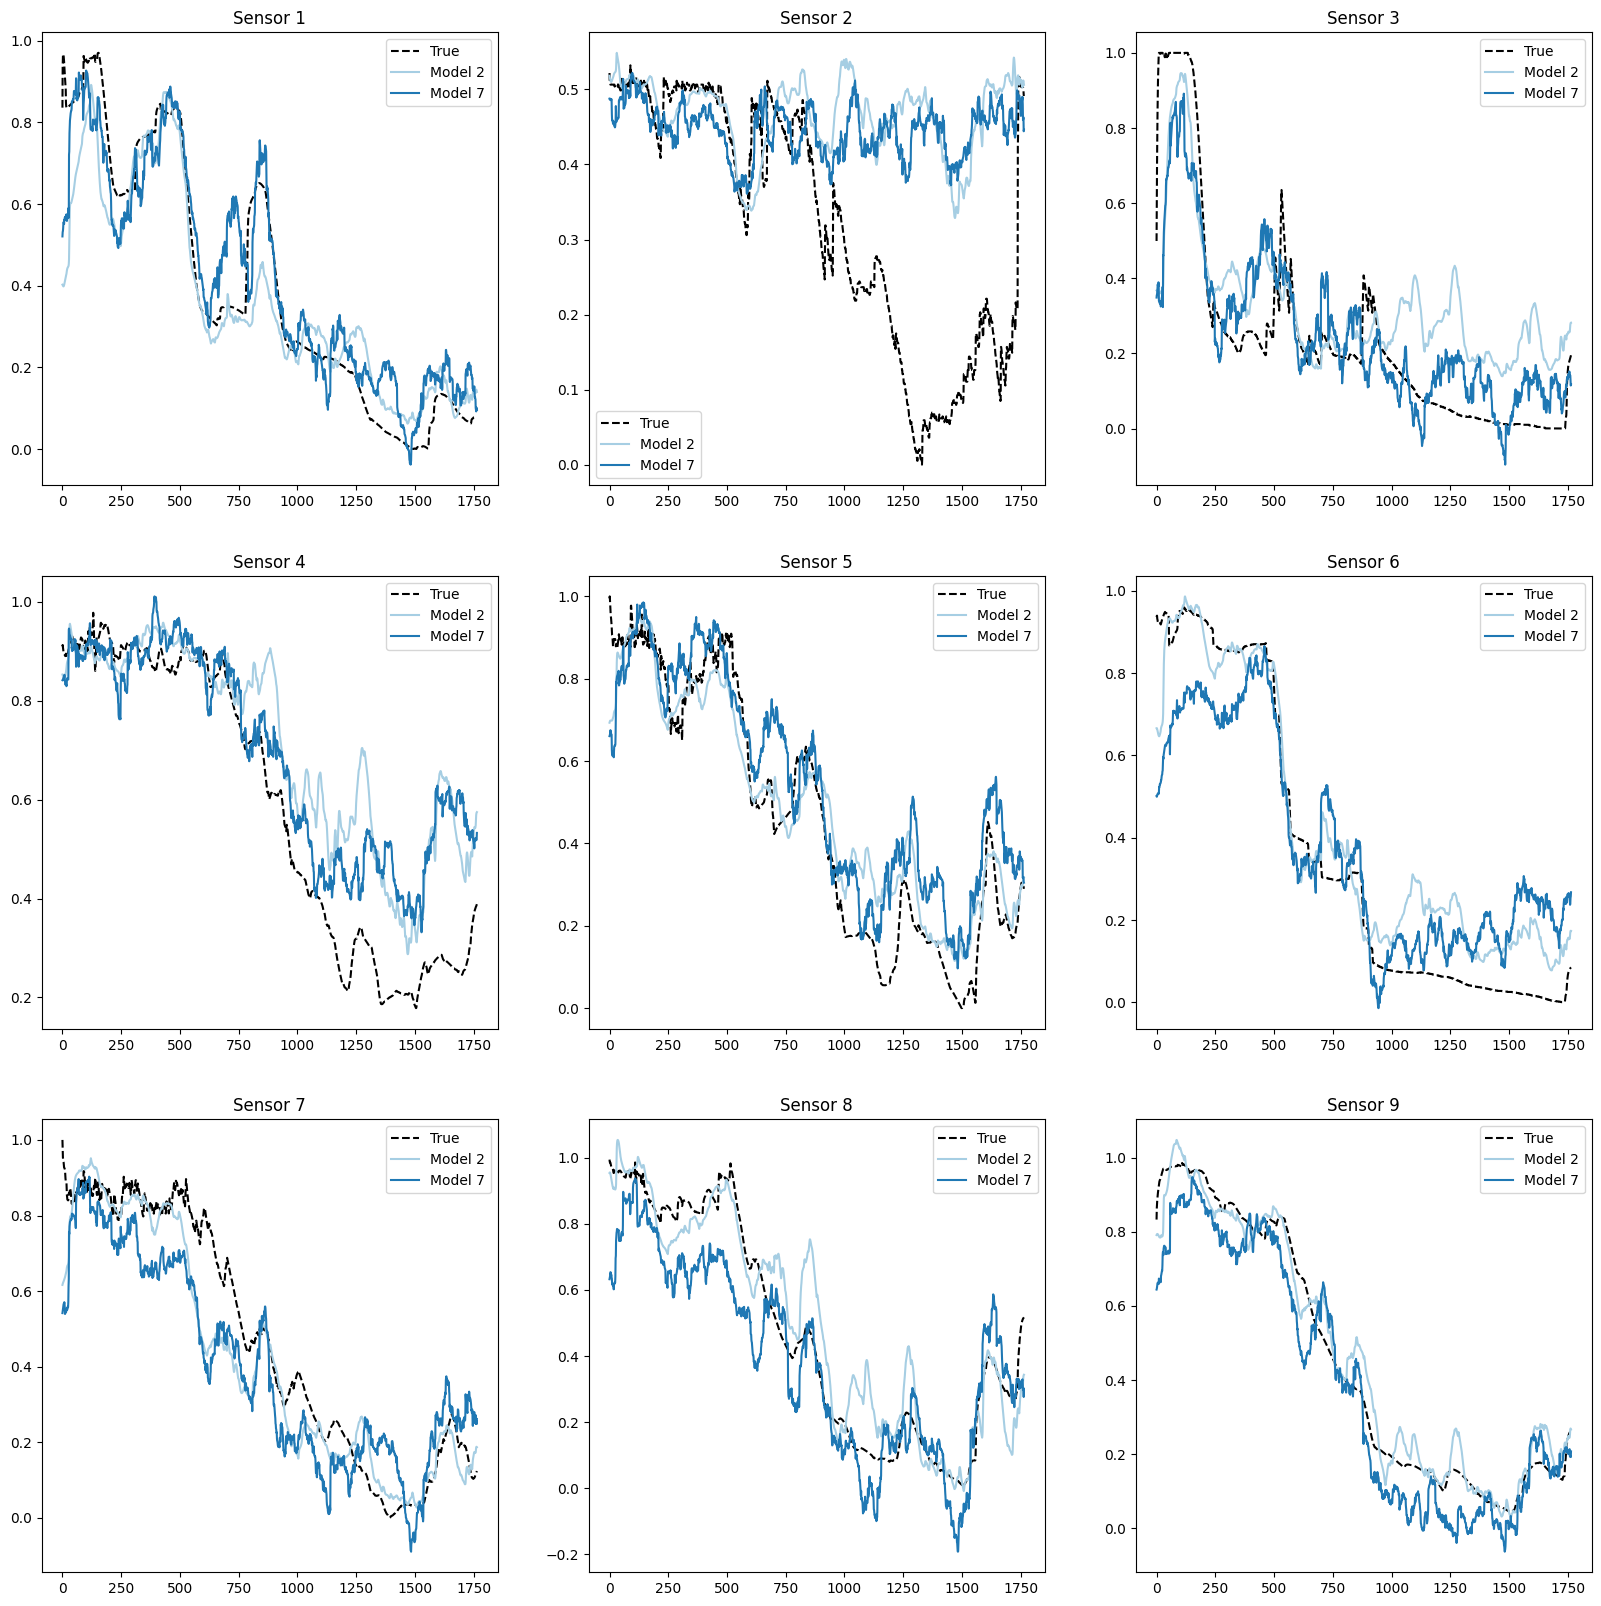

In [43]:
# 30 days ahead prediction
plot_same_sfw_predictions([s for s in range(0, 9)], model_results, best_models_30,  days=30)

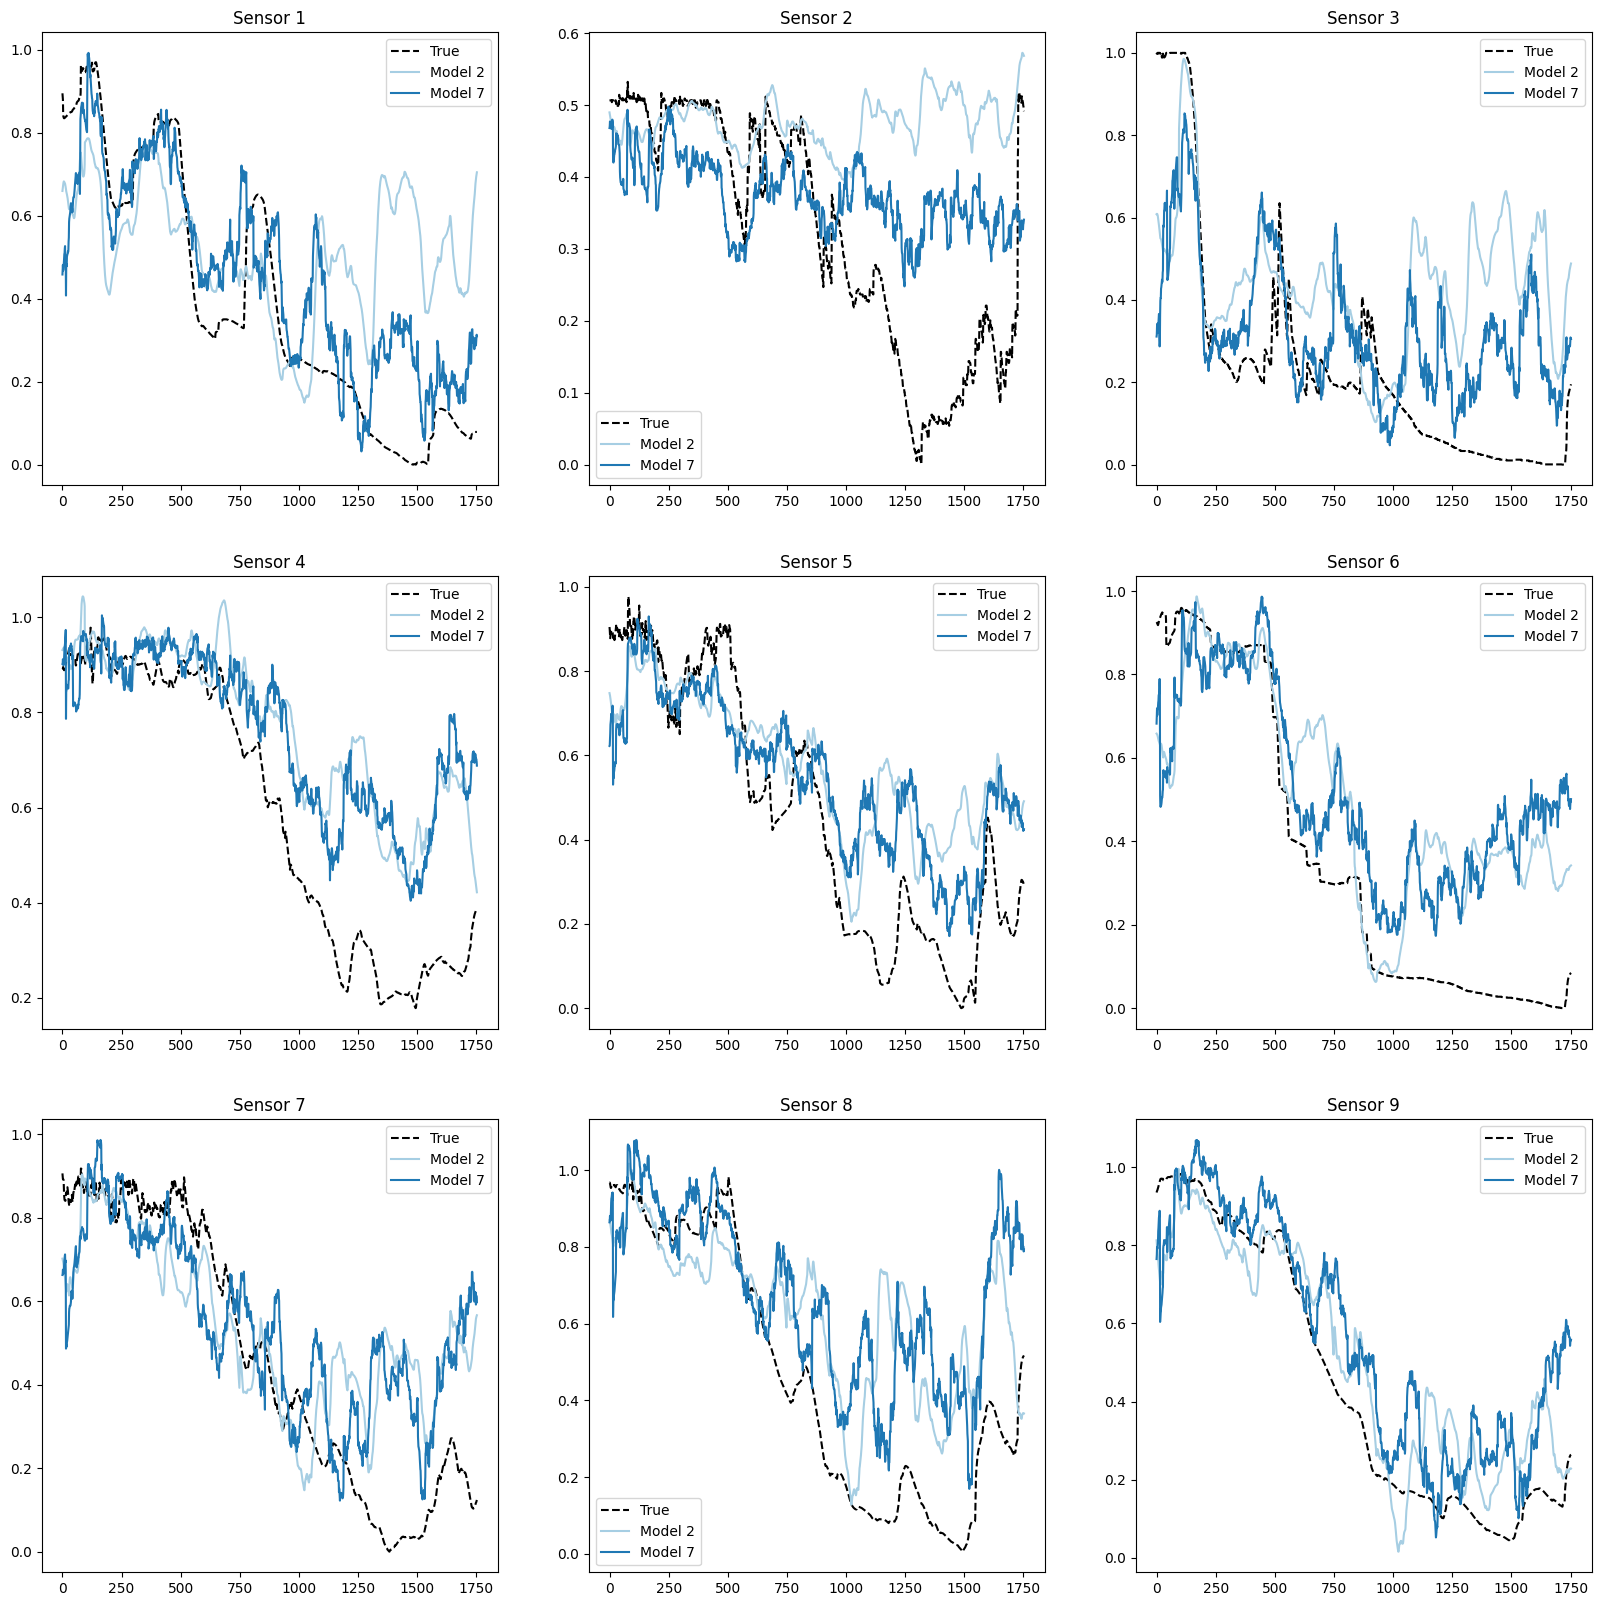

In [44]:
# 90 days ahead prediction
plot_same_sfw_predictions([s for s in range(0, 9)], model_results, best_models_90,  days=90)

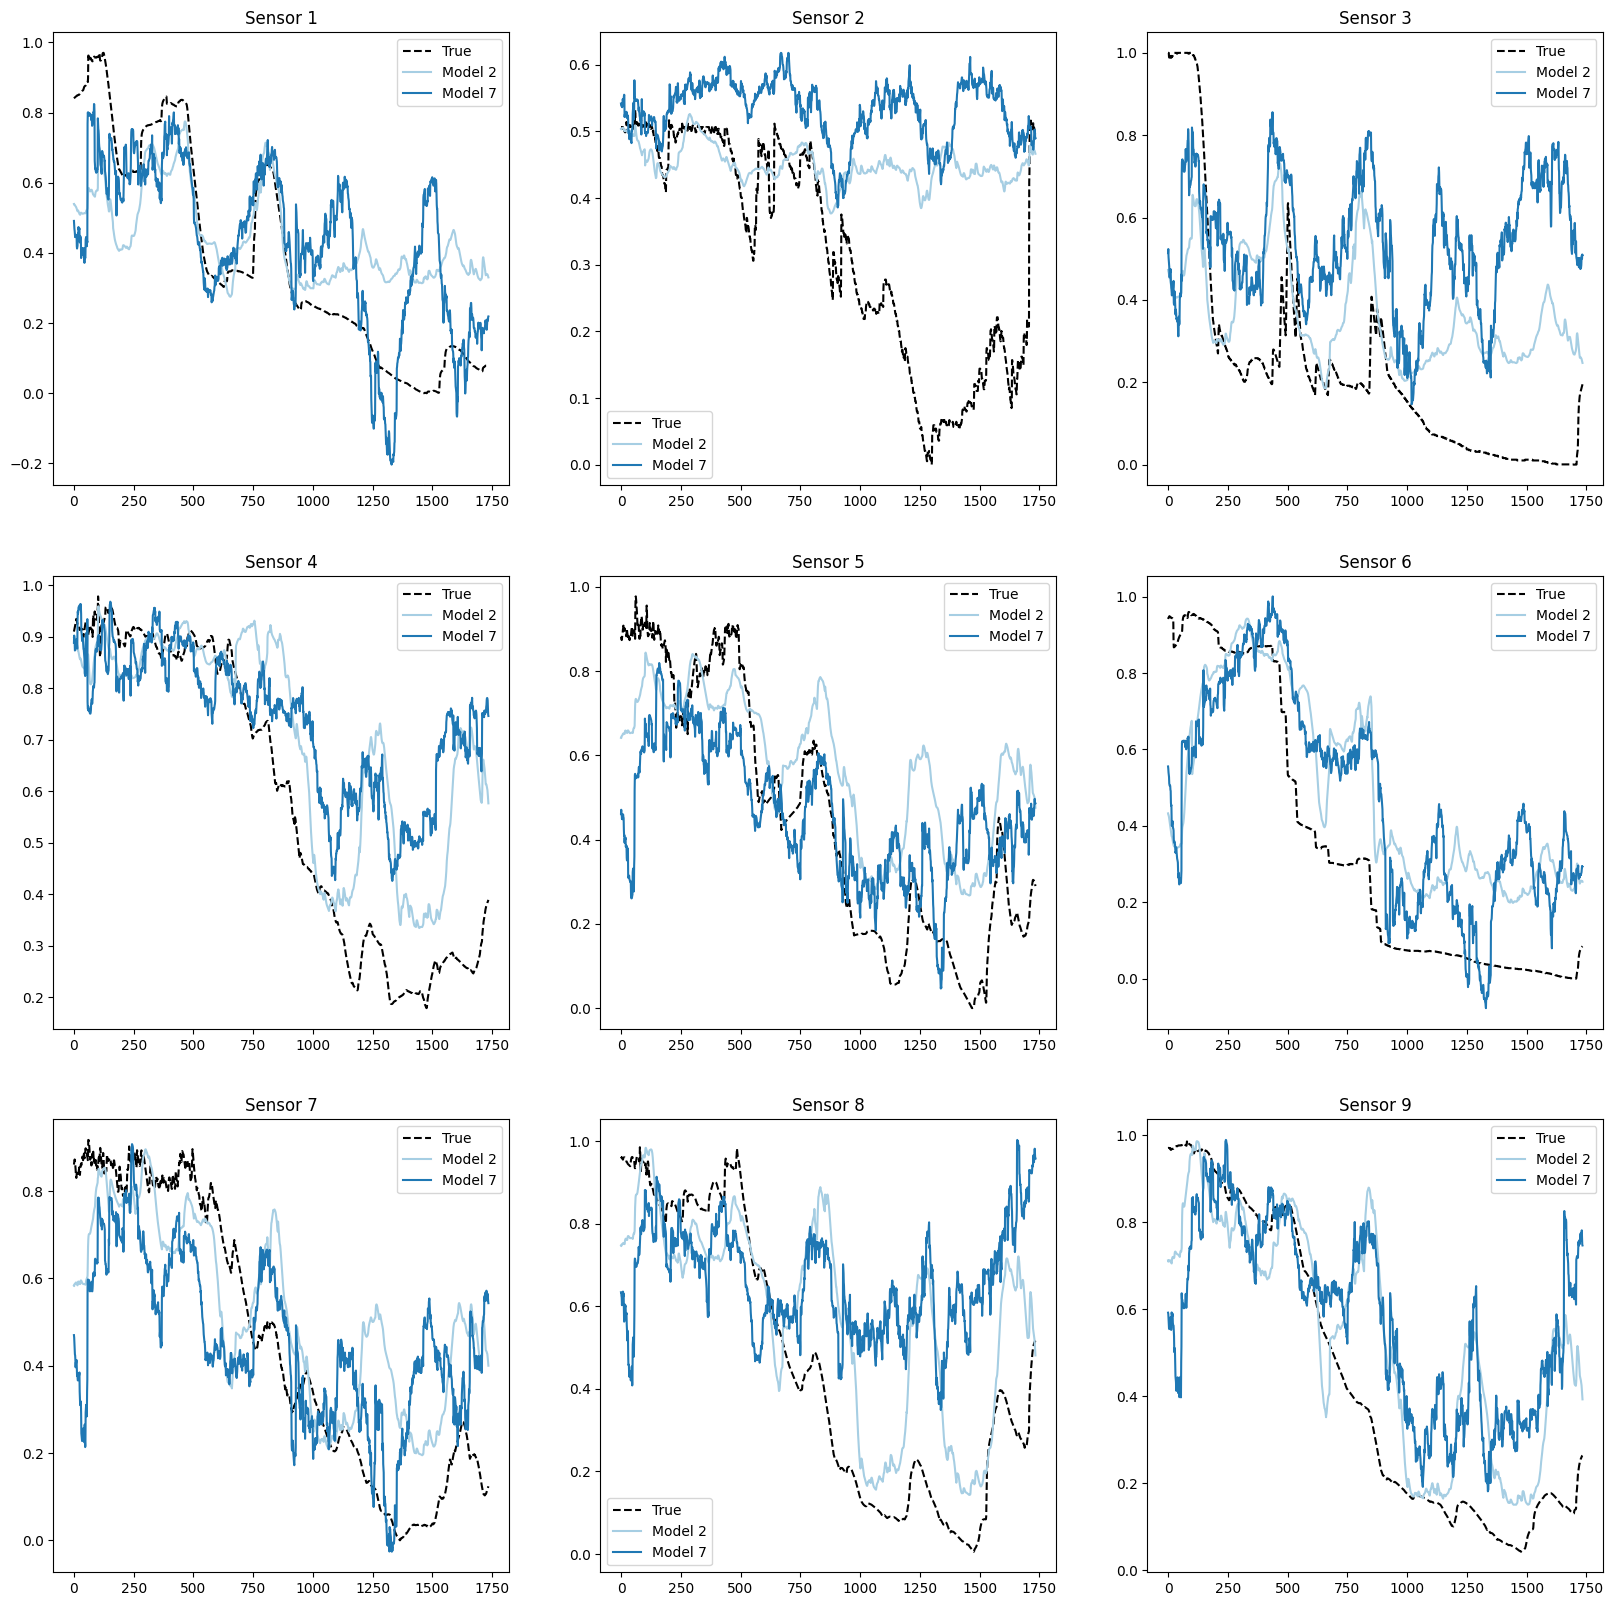

In [45]:
# 180 days ahead prediction
plot_same_sfw_predictions([s for s in range(0, 9)], model_results, best_models_180,  days=180)

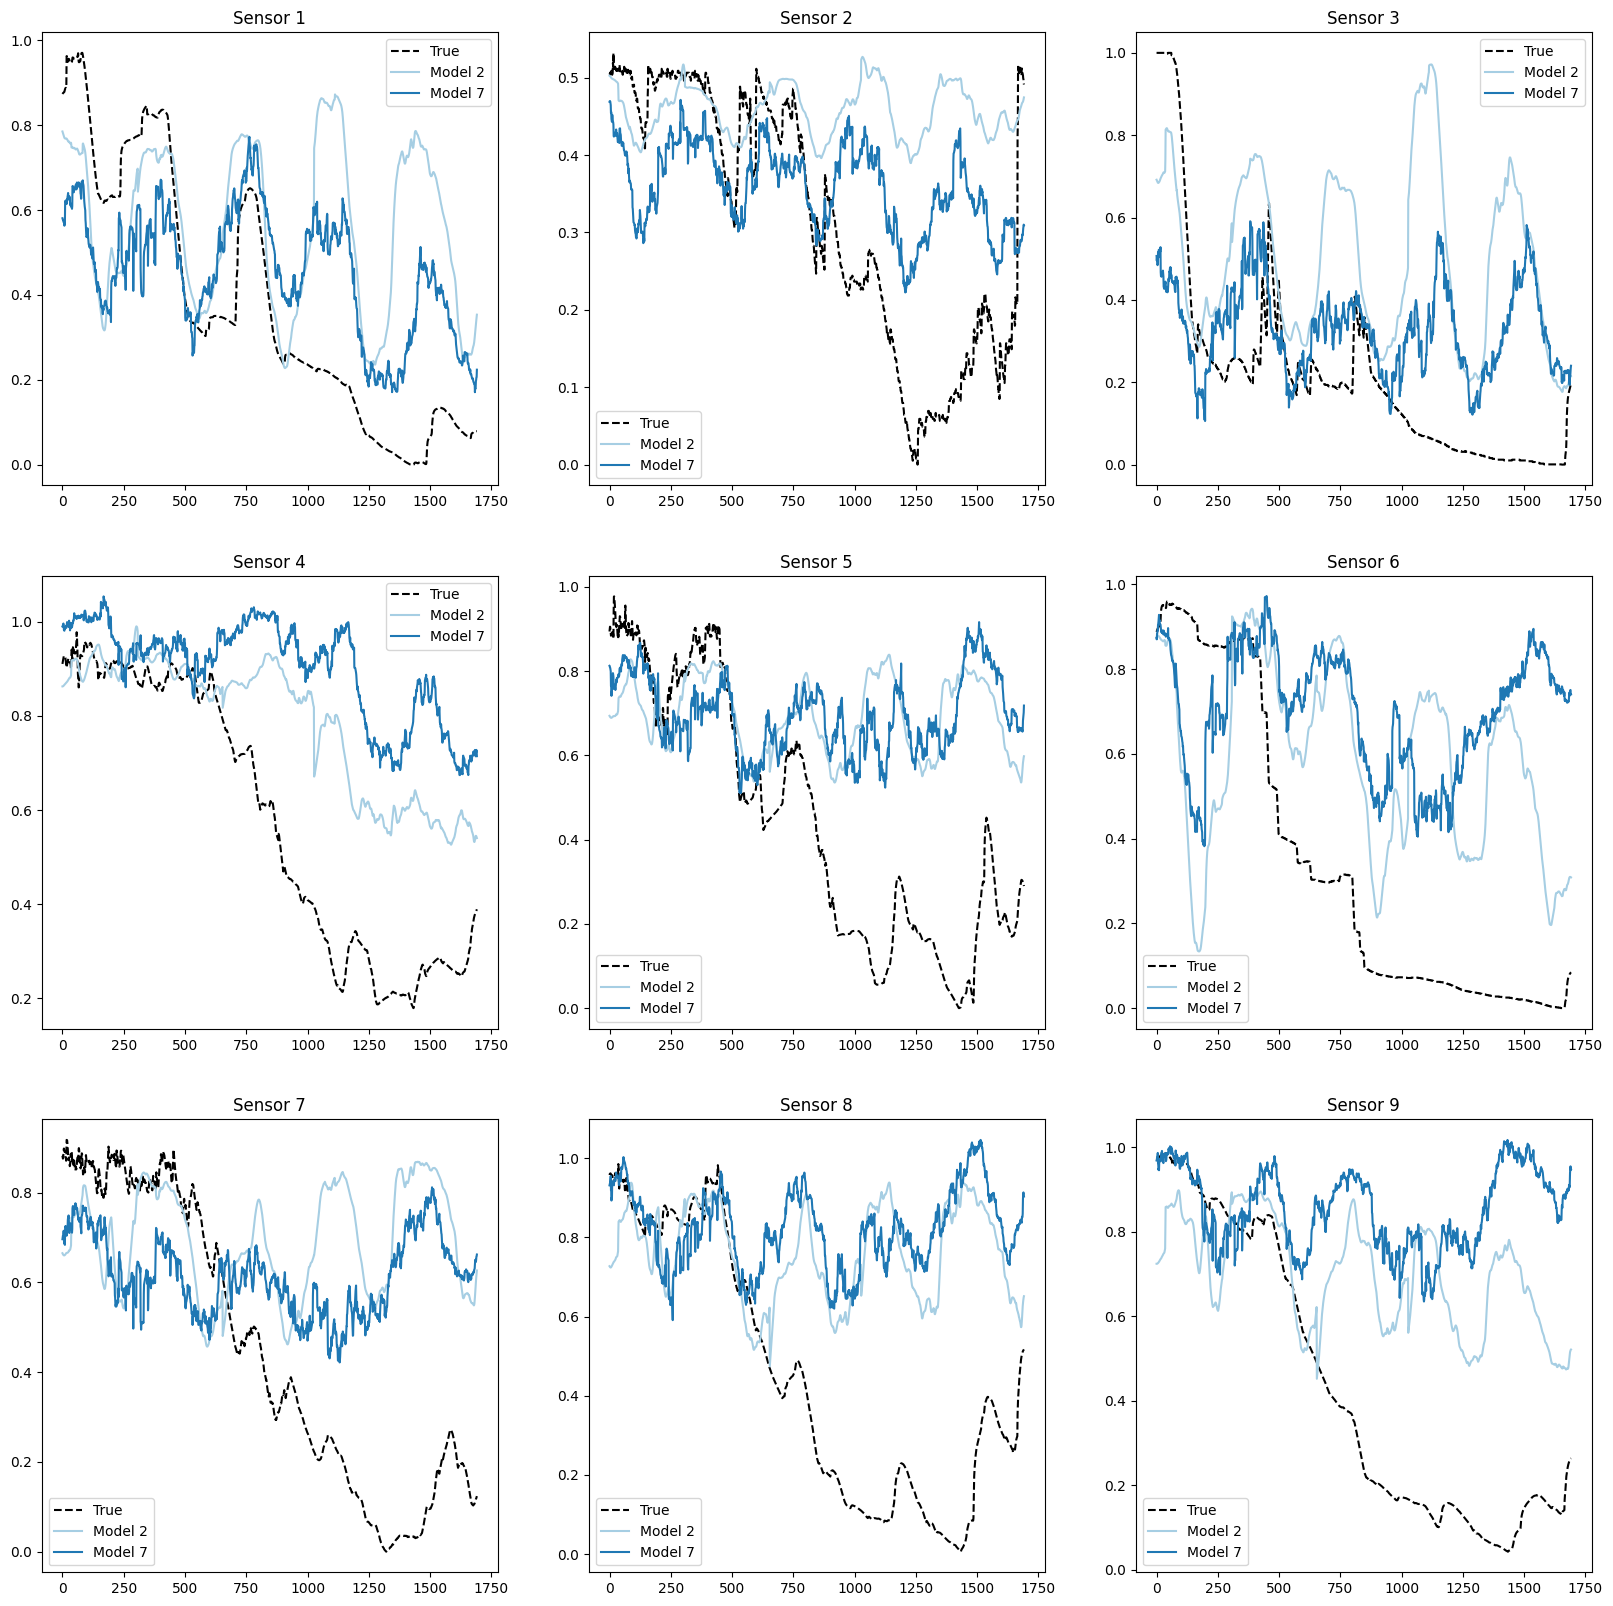

In [46]:
# 365 days ahead prediction
plot_same_sfw_predictions([s for s in range(0, 9)], model_results, best_models_365,  days=365)

In [47]:
# Get errors for best models 30 days ahead for all sensors
def get_errors(testing_stats, models):
    errors = {}
    for model in models:
        errors[model] = testing_stats[model]
    return errors

errors_30 = get_errors(testing_stats, best_models_30)

In [48]:
errors_m2 = pd.DataFrame(errors_30['model_5'],)
errors_m2['Model'] = 'Model 2'
errors_m2.reset_index(inplace=True)
errors_m2.set_index(['Model', 'index'], inplace=True)
errors_m2.index.names = ['Model', 'Metric']

In [49]:
errors_m2

total  reservoir_0  reservoir_1  reservoir_2  reservoir_3  \
Model   Metric                                                                 
Model 2 mse     0.019271     0.014196     0.046407     0.035153     0.029607   
        mae     0.099551     0.084767     0.156590     0.152341     0.133609   
        rmse    0.130454     0.119146     0.215422     0.187491     0.172067   
        r2      0.656504     0.847745    -0.684222     0.546951     0.642404   

                reservoir_4  reservoir_5  reservoir_6  reservoir_7  \
Model   Metric                                                       
Model 2 mse        0.010489     0.011360     0.012043     0.011025   
        mae        0.081935     0.086198     0.076795     0.081170   
        rmse       0.102418     0.106582     0.109740     0.105002   
        r2         0.886948     0.914122     0.881970     0.900131   

                reservoir_8  
Model   Metric               
Model 2 mse        0.003160  
        mae        0.042550  
        rmse       0.056217  
        r2         0.972486

In [50]:
errors_m7 = pd.DataFrame(errors_30['model_25'])
errors_m7['Model'] = 'Model 7'
errors_m7.reset_index(inplace=True)
errors_m7.set_index(['Model', 'index'], inplace=True)
errors_m7.index.names = ['Model', 'Metric']

In [51]:
errors_m7

total  reservoir_0  reservoir_1  reservoir_2  reservoir_3  \
Model   Metric                                                                 
Model 7 mse     0.020773     0.010237     0.040660     0.021791     0.022862   
        mae     0.111163     0.077753     0.148996     0.108294     0.113520   
        rmse    0.141254     0.101176     0.201644     0.147619     0.151203   
        r2      0.668778     0.889489    -0.474106     0.717313     0.724257   

                reservoir_4  reservoir_5  reservoir_6  reservoir_7  \
Model   Metric                                                       
Model 7 mse        0.018011     0.022224     0.020668     0.020884   
        mae        0.110745     0.123415     0.121403     0.115101   
        rmse       0.134206     0.149078     0.143765     0.144512   
        r2         0.805096     0.831884     0.796488     0.812355   

                reservoir_8  
Model   Metric               
Model 7 mse        0.009620  
        mae        0.081237  
        rmse       0.098083  
        r2         0.916221

In [52]:
results_30_per_sensor = pd.concat([errors_m2, errors_m7]).T
results_30_per_sensor[['Model 7']]

Model         Model 7                              
Metric            mse       mae      rmse        r2
total        0.020773  0.111163  0.141254  0.668778
reservoir_0  0.010237  0.077753  0.101176  0.889489
reservoir_1  0.040660  0.148996  0.201644 -0.474106
reservoir_2  0.021791  0.108294  0.147619  0.717313
reservoir_3  0.022862  0.113520  0.151203  0.724257
reservoir_4  0.018011  0.110745  0.134206  0.805096
reservoir_5  0.022224  0.123415  0.149078  0.831884
reservoir_6  0.020668  0.121403  0.143765  0.796488
reservoir_7  0.020884  0.115101  0.144512  0.812355
reservoir_8  0.009620  0.081237  0.098083  0.916221

In [53]:
import pickle
# Get scalers from Model 2 and Model 7
def get_scaler(model_name):
    with open(utils.get_root_dir()+f'/model/final_models/{model_name}/scalers.pkl', 'rb') as f:
        x_scaler, y_scaler = pickle.load(f)
    return x_scaler, y_scaler
scalers_m2 = [get_scaler(m) for m in m2.keys()]
scalers_m7 = [get_scaler(m) for m in m7.keys()]

In [54]:
# Convert y_pred for each model to the real scale (Model 2)
y_pred_m2 = []
for m in range(0, 4):
    y_pred = []
    for s in range(0, 9):
        y_pred.append(get_pred(list(m2.keys())[m], model_results, s))
    y_pred_m2.append(y_pred)
y_pred_m2 = [scalers_m2[i][1].inverse_transform(np.array(y_pred_m2[i]).T) for i in range(0, 4)]

In [55]:
# Convert y_pred for each model to the real scale (Model 7)
y_pred_m7 = []
for m in range(0, 4):
    y_pred = []
    for s in range(0, 9):
        y_pred.append(get_pred(list(m7.keys())[m], model_results, s))
    y_pred_m7.append(y_pred)
y_pred_m7 = [scalers_m7[i][1].inverse_transform(np.array(y_pred_m7[i]).T) for i in range(0, 4)]

In [56]:
# Convert y_test for each model to the real scale
y_test = []
for m in range(0, 4):
    y_test_ = []
    for s in range(0, 9):
        y_test_.append(get_test(model_results, s))
    y_test.append(y_test_)
y_test = [scalers_m7[i][1].inverse_transform(np.array(y_test[i]).T) for i in range(0, 4)]

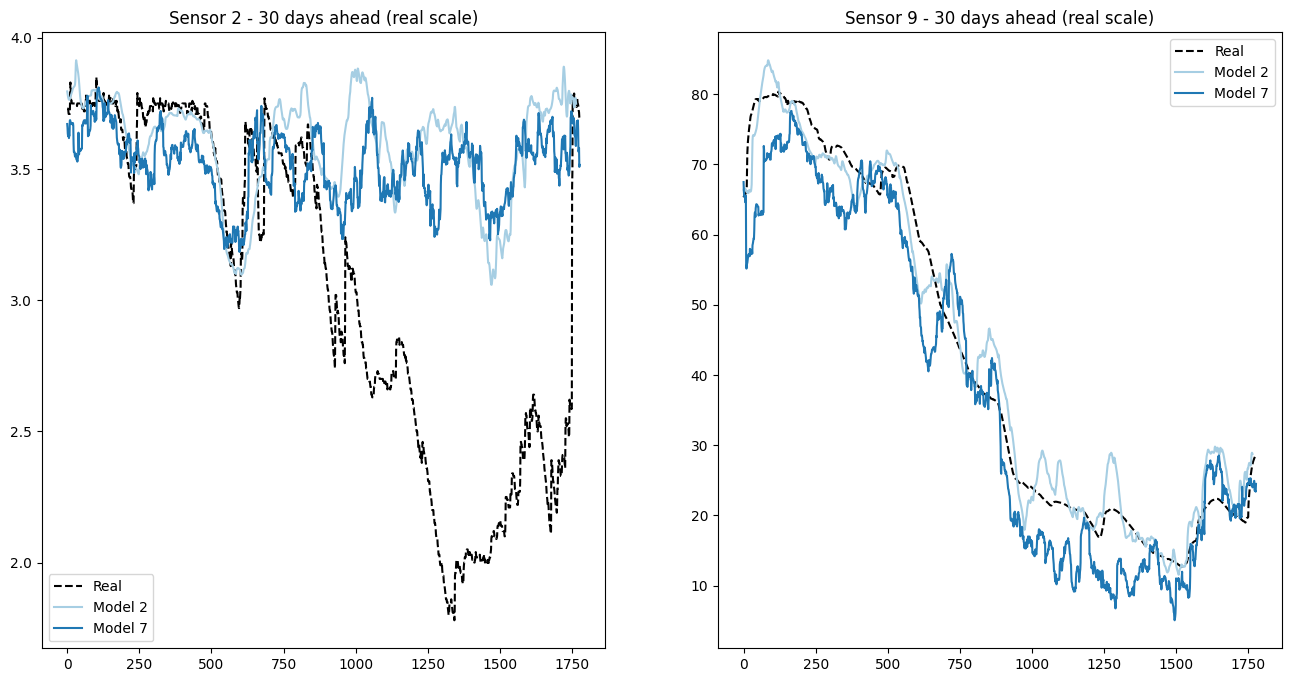

In [57]:
# Plot 30 days predictions for sensor 2 and sensor 9
cmap = plt.get_cmap('Paired')
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].plot(y_test[0][:, 1], label='Real', linestyle='--', color='black',)
ax[0].plot(y_pred_m2[0][:, 1], label=f'Model 2', color=cmap(0))
ax[0].plot(y_pred_m7[0][:, 1], label=f'Model 7', color = cmap(1))
ax[0].set_title('Sensor 2 - 30 days ahead (real scale)')
ax[0].legend()
ax[1].plot(y_test[0][:, 8], label='Real', linestyle='--', color='black',)
ax[1].plot(y_pred_m2[0][:, 8], label=f'Model 2', color=cmap(0))
ax[1].plot(y_pred_m7[0][:, 8], label=f'Model 7', color = cmap(1))
ax[1].set_title('Sensor 9 - 30 days ahead (real scale)')
ax[1].legend()
plt.show()

In [58]:
y_test[0]

array([[ 28.89     ,   3.73     ,   1.5799999, ..., 171.49     ,
        105.829994 ,  65.310005 ],
       [ 28.89     ,   3.73     ,   1.5799999, ..., 171.11     ,
        105.9      ,  65.42     ],
       [ 28.89     ,   3.73     ,   1.5799999, ..., 170.74     ,
        105.95     ,  65.54     ],
       ...,
       [ 11.062    ,   3.717    ,   1.0899999, ...,  66.148    ,
         66.313    ,  28.496    ],
       [ 11.062    ,   3.697    ,   1.099    , ...,  66.612    ,
         66.39101  ,  28.521    ],
       [ 11.062    ,   3.691    ,   1.1079999, ...,  66.987    ,
         66.443    ,  28.560999 ]], dtype=float32)

In [59]:
# Calc mse, mae, rmse and r2 for the y_test[0][1] and new y_pred_m2[0][1] and y_pred_m7[0][1]
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

min_len = min(len(y_test[0][:, 1]), len(y_pred_m2[0][:, 1]), len(y_pred_m7[0][:, 1]))

# Extract the relevant data
y_true = y_test[0][-min_len:, 1]
y_pred_m2_sensor1 = y_pred_m2[0][-min_len:, 1]
y_pred_m7_sensor1 = y_pred_m7[0][-min_len:, 1]

# Calculate metrics for Model 2
mse_m2 = mean_squared_error(y_true, y_pred_m2_sensor1)
mae_m2 = mean_absolute_error(y_true, y_pred_m2_sensor1)
rmse_m2 = np.sqrt(mse_m2)
r2_m2 = r2_score(y_true, y_pred_m2_sensor1)

# Calculate metrics for Model 7
mse_m7 = mean_squared_error(y_true, y_pred_m7_sensor1)
mae_m7 = mean_absolute_error(y_true, y_pred_m7_sensor1)
rmse_m7 = np.sqrt(mse_m7)
r2_m7 = r2_score(y_true, y_pred_m7_sensor1)

# Print the results
print(f"Model 2 - MSE: {mse_m2}, MAE: {mae_m2}, RMSE: {rmse_m2}, R2: {r2_m2}")
print(f"Model 7 - MSE: {mse_m7}, MAE: {mae_m7}, RMSE: {rmse_m7}, R2: {r2_m7}")

Model 2 - MSE: 0.7022292613983154, MAE: 0.6091344356536865, RMSE: 0.8379911780357361, R2: -0.6842225790023804
Model 7 - MSE: 0.6194036602973938, MAE: 0.582952618598938, RMSE: 0.7870219945907593, R2: -0.4855741262435913


In [60]:
min_len = min(len(y_test[0][:, 1]), len(y_pred_m2[0][:, 1]), len(y_pred_m7[0][:, 1]))

# Extract the relevant data
y_true = y_test[0][-min_len:, 8]
y_pred_m2_sensor1 = y_pred_m2[0][-min_len:, 8]
y_pred_m7_sensor1 = y_pred_m7[0][-min_len:, 8]

# Calculate metrics for Model 2
mse_m2 = mean_squared_error(y_true, y_pred_m2_sensor1)
mae_m2 = mean_absolute_error(y_true, y_pred_m2_sensor1)
rmse_m2 = np.sqrt(mse_m2)
r2_m2 = r2_score(y_true, y_pred_m2_sensor1)

# Calculate metrics for Model 7
mse_m7 = mean_squared_error(y_true, y_pred_m7_sensor1)
mae_m7 = mean_absolute_error(y_true, y_pred_m7_sensor1)
rmse_m7 = np.sqrt(mse_m7)
r2_m7 = r2_score(y_true, y_pred_m7_sensor1)

# Print the results
print(f"Model 2 - MSE: {mse_m2}, MAE: {mae_m2}, RMSE: {rmse_m2}, R2: {r2_m2}")
print(f"Model 7 - MSE: {mse_m7}, MAE: {mae_m7}, RMSE: {rmse_m7}, R2: {r2_m7}")

Model 2 - MSE: 16.274227142333984, MAE: 3.0533602237701416, RMSE: 4.034132957458496, R2: 0.9724864959716797
Model 7 - MSE: 49.67460250854492, MAE: 5.84757137298584, RMSE: 7.04802131652832, R2: 0.9160192608833313


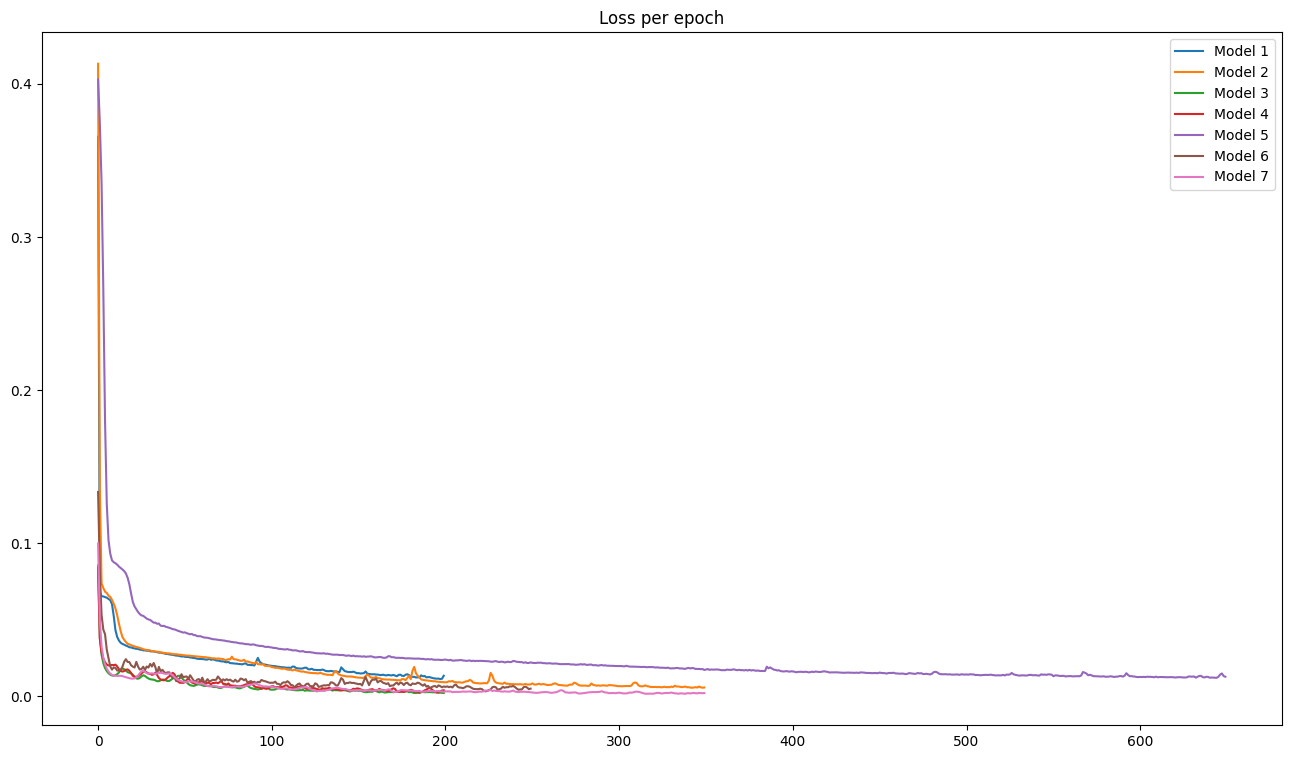

In [61]:
# Print error chart (MSE) per model
plt.figure(figsize=(16, 9))
plt.title("Loss per epoch")
for i in range(1, len(sfw_30)+1):
    plt.plot(training_stats[sfw_30[i-1]]['epoch_losses'], label=f'Model {i}')
plt.legend()
plt.show()

In [62]:
training_stats['model_5']

{'epoch_num': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  1